# Home 3: Build a CNN for image recognition.

### Name: [Your-Name?]


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [9]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [10]:
def to_one_hot(y, num_class=10):
    one_hot = numpy.zeros((len(y), num_class))
    for i in range(len(y)):
        one_hot[i, y[i]] = 1
    return one_hot

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [222]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

# train_indices = rand_indices[0:4000]
# valid_indices = rand_indices[4000:5000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [227]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Add, BatchNormalization, Activation, Dropout
from keras.models import Sequential

# A simple sequential model
model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (5, 5), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Conv2D(128, (3, 3),padding='same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

# model.add(Dropout(rate=0.5))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_313 (Conv2D)          (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_110 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_136 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_314 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_137 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_315 (Conv2D)          (None, 16, 16, 64)        18496     
__________

In [228]:
from keras import optimizers

learning_rate = 1E-3 # to be tuned!

model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=learning_rate),
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['acc'])

In [229]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(x_tr)

history = model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=32),
                              steps_per_epoch=len(x_tr) / 32, epochs=200,
                              validation_data=(x_val, y_val))

# history = model.fit(x_tr, y_tr, batch_size=32, epochs=20, validation_data=(x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 132s 105ms/step - loss: 1.5666 - acc: 0.4223 - val_loss: 1.6435 - val_acc: 0.4457
Epoch 2/100
1250/1250 [==============================] - 123s 98ms/step - loss: 1.2100 - acc: 0.5680 - val_loss: 0.9934 - val_acc: 0.6484
Epoch 3/100
1250/1250 [==============================] - 122s 98ms/step - loss: 1.0402 - acc: 0.6319 - val_loss: 1.1252 - val_acc: 0.6059
Epoch 4/100
1250/1250 [==============================] - 122s 97ms/step - loss: 0.9413 - acc: 0.6684 - val_loss: 0.9770 - val_acc: 0.6637
Epoch 5/100
1250/1250 [==============================] - 122s 98ms/step - loss: 0.8763 - acc: 0.6915 - val_loss: 0.8933 - val_acc: 0.6970
Epoch 6/100
1250/1250 [==============================] - 118s 94ms/step - loss: 0.8228 - acc: 0.7124 - val_loss: 0.8771 - val_acc: 0.7022
Epoch 7/100
1250/1250 [==============================] - 119s 96ms/step - loss: 0.7768 - acc: 0.7288 - val_loss: 0.7971 - val_acc: 0.7302
Epoch 8/100
1250/1250 [==========

Epoch 60/100
1250/1250 [==============================] - 122s 98ms/step - loss: 0.3751 - acc: 0.8699 - val_loss: 0.3719 - val_acc: 0.8723
Epoch 61/100
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3663 - acc: 0.8737 - val_loss: 0.4782 - val_acc: 0.8443
Epoch 62/100
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3678 - acc: 0.8713 - val_loss: 0.4236 - val_acc: 0.8618
Epoch 63/100
1250/1250 [==============================] - 123s 98ms/step - loss: 0.3627 - acc: 0.8748 - val_loss: 0.3981 - val_acc: 0.8640
Epoch 64/100
1250/1250 [==============================] - 122s 98ms/step - loss: 0.3577 - acc: 0.8770 - val_loss: 0.4641 - val_acc: 0.8467
Epoch 65/100
1250/1250 [==============================] - 122s 98ms/step - loss: 0.3607 - acc: 0.8741 - val_loss: 0.5626 - val_acc: 0.8253
Epoch 66/100
1250/1250 [==============================] - 121s 97ms/step - loss: 0.3592 - acc: 0.8751 - val_loss: 0.4458 - val_acc: 0.8558
Epoch 67/100
1250/1250 [===

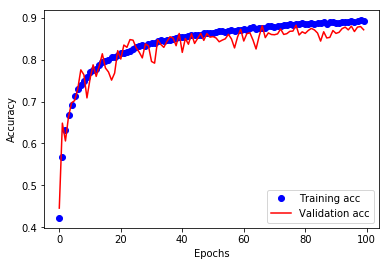

In [230]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [232]:
model_final = Sequential()

model_final.add(Conv2D(32, (5, 5), padding='same', input_shape=(32, 32, 3)))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Conv2D(32, (3, 3), padding='same'))
model_final.add(Activation('relu'))
model_final.add(MaxPooling2D((2, 2)))

model_final.add(Conv2D(64, (3, 3), padding='same'))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Conv2D(64, (3, 3),  padding='same'))
model_final.add(Activation('relu'))
model_final.add(MaxPooling2D((2, 2)))

model_final.add(Conv2D(128, (3, 3), padding='same'))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dropout(rate=0.5))
model_final.add(Conv2D(128, (3, 3),padding='same'))
model_final.add(Activation('relu'))
model_final.add(MaxPooling2D((2, 2)))

model_final.add(Flatten())

model_final.add(Dropout(rate=0.5))
model_final.add(Dense(256))
model_final.add(BatchNormalization())
model_final.add(Activation('relu'))
model_final.add(Dense(128))
model_final.add(Activation('relu'))
model_final.add(Dense(10, activation='softmax'))

model_final.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_319 (Conv2D)          (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_114 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_144 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_320 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_145 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_321 (Conv2D)          (None, 16, 16, 64)        18496     
__________

In [233]:

learning_rate = 1E-3

model_final.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['acc'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True)

datagen.fit(x_train)

history = model_final.fit_generator(datagen.flow(x_train, y_train_vec, batch_size=32),
                              steps_per_epoch=len(x_train) / 32, epochs=200)


Epoch 1/200
1563/1562 [==============================] - 144s 92ms/step - loss: 1.8671 - acc: 0.3004
Epoch 2/200
1563/1562 [==============================] - 125s 80ms/step - loss: 1.5980 - acc: 0.4113
Epoch 3/200
1563/1562 [==============================] - 124s 79ms/step - loss: 1.4479 - acc: 0.4733
Epoch 4/200
1563/1562 [==============================] - 120s 77ms/step - loss: 1.3382 - acc: 0.5150
Epoch 5/200
1563/1562 [==============================] - 124s 79ms/step - loss: 1.2654 - acc: 0.5463
Epoch 6/200
1563/1562 [==============================] - 129s 83ms/step - loss: 1.2072 - acc: 0.5704
Epoch 7/200
1563/1562 [==============================] - 125s 80ms/step - loss: 1.1626 - acc: 0.5887
Epoch 8/200
1563/1562 [==============================] - 122s 78ms/step - loss: 1.1266 - acc: 0.6020
Epoch 9/200
1563/1562 [==============================] - 124s 79ms/step - loss: 1.0883 - acc: 0.6164
Epoch 10/200
1563/1562 [==============================] - 126s 80ms/step - loss: 1.0609 - a

1563/1562 [==============================] - 139s 89ms/step - loss: 0.6628 - acc: 0.7718
Epoch 82/200
1563/1562 [==============================] - 138s 88ms/step - loss: 0.6690 - acc: 0.7714
Epoch 83/200
1563/1562 [==============================] - 138s 88ms/step - loss: 0.6617 - acc: 0.7712
Epoch 84/200
1563/1562 [==============================] - 138s 88ms/step - loss: 0.6610 - acc: 0.7725
Epoch 85/200
1563/1562 [==============================] - 138s 88ms/step - loss: 0.6630 - acc: 0.7727
Epoch 86/200
1563/1562 [==============================] - 145s 92ms/step - loss: 0.6629 - acc: 0.7709
Epoch 87/200
1563/1562 [==============================] - 148s 95ms/step - loss: 0.6618 - acc: 0.7722
Epoch 88/200
1563/1562 [==============================] - 148s 95ms/step - loss: 0.6622 - acc: 0.7724
Epoch 89/200
1563/1562 [==============================] - 147s 94ms/step - loss: 0.6609 - acc: 0.7740
Epoch 90/200
1563/1562 [==============================] - 144s 92ms/step - loss: 0.6523 - acc: 

1563/1562 [==============================] - 136s 87ms/step - loss: 0.5922 - acc: 0.7951
Epoch 161/200
1563/1562 [==============================] - 135s 86ms/step - loss: 0.5918 - acc: 0.7969
Epoch 162/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.6008 - acc: 0.7953
Epoch 163/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.5928 - acc: 0.7960
Epoch 164/200
1563/1562 [==============================] - 135s 87ms/step - loss: 0.5955 - acc: 0.7950
Epoch 165/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.5918 - acc: 0.7968
Epoch 166/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.5916 - acc: 0.7959
Epoch 167/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.5935 - acc: 0.7939
Epoch 168/200
1563/1562 [==============================] - 136s 87ms/step - loss: 0.5892 - acc: 0.7984
Epoch 169/200
1563/1562 [==============================] - 135s 86ms/step - loss: 0.590

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [231]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 8s 796us/step
loss = 0.4341993057012558
accuracy = 0.8609


In [234]:
loss_and_acc = model_final.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 12s 1ms/step
loss = 0.39509083096981046
accuracy = 0.8634
